#                                       Predicting Offer Acceptance in Credit Card Marketing Campaigns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('creditcardmarketing-bbm.csv')

In [4]:
df=pd.DataFrame(data)

# Preprocessing

In [6]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [8]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [9]:
df.shape

(18000, 17)

In [10]:
df.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [11]:
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [12]:
df=df.fillna(0)

In [13]:
df.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [14]:
df.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [15]:
df.duplicated().sum()

0

In [16]:
df=df.drop(columns=['Customer Number','Overdraft Protection'])
df

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Label Encoding

In [18]:
cat_cols = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 
             'Credit Rating', 'Own Your Home']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,0,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,0,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0
3,0,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0
4,0,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  int32  
 1   Reward                18000 non-null  int32  
 2   Mailer Type           18000 non-null  int32  
 3   Income Level          18000 non-null  int32  
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Credit Rating         18000 non-null  int32  
 6   # Credit Cards Held   18000 non-null  int64  
 7   # Homes Owned         18000 non-null  int64  
 8   Household Size        18000 non-null  int64  
 9   Own Your Home         18000 non-null  int32  
 10  Average Balance       18000 non-null  float64
 11  Q1 Balance            18000 non-null  float64
 12  Q2 Balance            18000 non-null  float64
 13  Q3 Balance            18000 non-null  float64
 14  Q4 Balance            18000 non-null  float64
dtypes: float64(5), int3

# Handling Inbalanced Data

In [22]:
target_value_count=df['Offer Accepted'].value_counts()

In [23]:
target_value_count

Offer Accepted
0    16977
1     1023
Name: count, dtype: int64

In [24]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted')], df['Offer Accepted'])

In [25]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 18000
Resampled balanced dataset shape 33954


In [26]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted'))

In [27]:
balanced_df['Offer Accepted'] = y_smote

In [28]:
balanced_df.shape

(33954, 15)

In [29]:
target_value_count=balanced_df['Offer Accepted'].value_counts()
target_value_count

Offer Accepted
0    16977
1    16977
Name: count, dtype: int64

In [30]:
balanced_df.head()

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0,0
1,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0,0
2,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0,0
3,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0,0
4,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0,0


In [31]:
balanced_df.duplicated().sum()

2

In [32]:
balanced_df.drop_duplicates(inplace = True)

In [33]:
balanced_df.duplicated().sum()

0

In [34]:
balanced_df.isnull().sum()

Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
Offer Accepted          0
dtype: int64

In [35]:
df1=balanced_df.copy()
df1

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1,2,2,2,5,1,147.250000,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,2,2,2,1,2,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,2,0,1,1,4,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1,2,2,1,6,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,0,1,0,1,1,2,1,1,0,1224.329632,540.768252,1761.342167,1661.903355,933.304755,1
33950,0,1,1,1,2,1,1,3,1,989.343048,147.876554,868.735395,1468.842982,1471.917261,1
33951,1,0,0,1,0,1,1,5,0,1123.493505,1792.765323,1737.367447,429.808669,534.032582,1
33952,1,0,2,1,1,1,1,3,1,949.752307,154.924491,1600.687057,1456.570895,586.826787,1


In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reward,33952.0,0.794327,0.791080,0.0,0.000000,1.000000,1.000000,2.00
Mailer Type,33952.0,0.505095,0.499981,0.0,0.000000,1.000000,1.000000,1.00
Income Level,33952.0,1.126119,0.770543,0.0,1.000000,1.000000,2.000000,2.00
# Bank Accounts Open,33952.0,1.166205,0.396039,1.0,1.000000,1.000000,1.000000,3.00
Credit Rating,33952.0,0.943567,0.683347,0.0,0.000000,1.000000,1.000000,2.00
# Credit Cards Held,33952.0,1.745788,0.735195,1.0,1.000000,2.000000,2.000000,4.00
# Homes Owned,33952.0,1.129683,0.351805,1.0,1.000000,1.000000,1.000000,3.00
Household Size,33952.0,3.292472,1.046527,1.0,3.000000,3.000000,4.000000,9.00
Own Your Home,33952.0,0.541176,0.498309,0.0,0.000000,1.000000,1.000000,1.00
Average Balance,33952.0,936.910086,349.870094,0.0,791.561669,1008.166492,1151.750000,3366.25


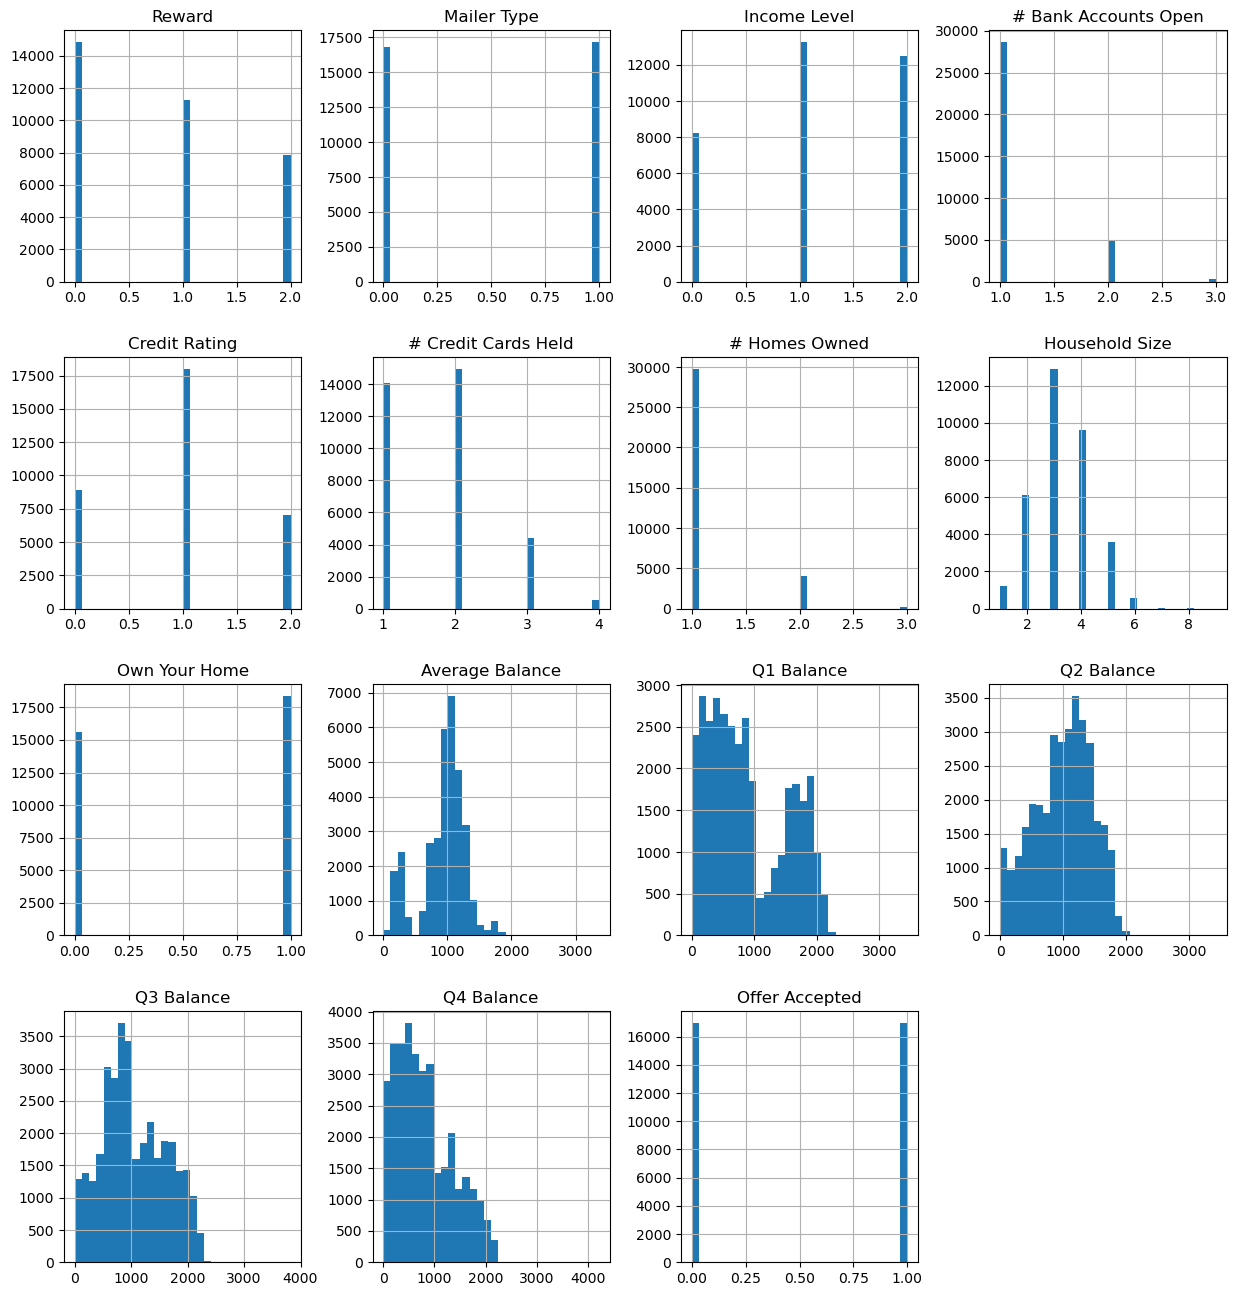

In [37]:
df1.hist(figsize=(15, 16), bins=30)
plt.show()

In [38]:
numerical_features = df1.select_dtypes(include = 'number')
print(numerical_features)

       Reward  Mailer Type  Income Level  # Bank Accounts Open  Credit Rating  \
0           0            0             0                     1              0   
1           0            0             2                     1              2   
2           0            1             0                     2              2   
3           0            0             2                     2              0   
4           0            0             2                     1              2   
...       ...          ...           ...                   ...            ...   
33949       0            1             0                     1              1   
33950       0            1             1                     1              2   
33951       1            0             0                     1              0   
33952       1            0             2                     1              1   
33953       2            0             1                     1              1   

       # Credit Cards Held 

# Handling Outliers

Text(0.5, 1.0, 'Box Plot of Credit Card Usage')

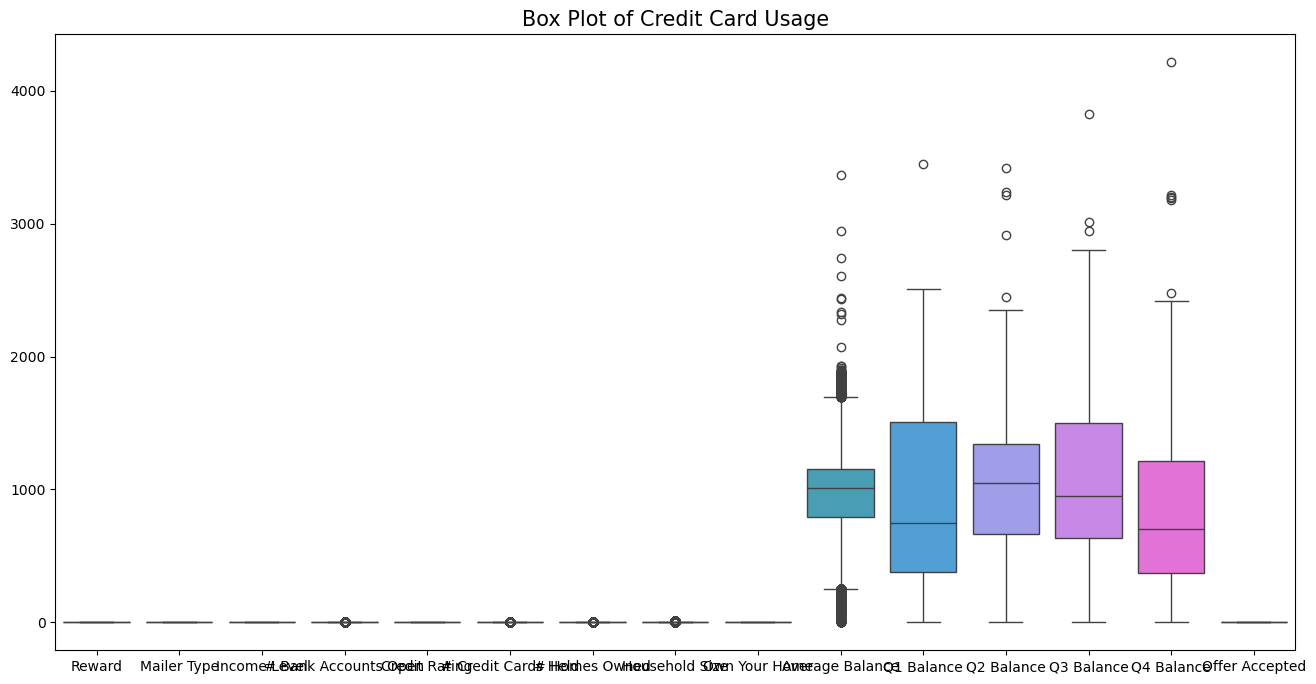

In [40]:
plt.figure(figsize = (16,8))
sns.boxplot(df1[numerical_features.columns])
plt.title("Box Plot of Credit Card Usage", fontsize=15)

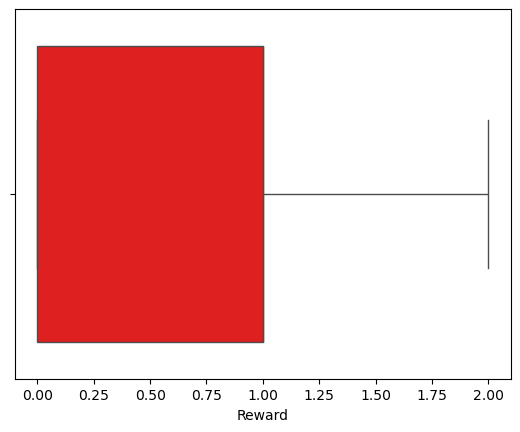

<Figure size 500x500 with 0 Axes>

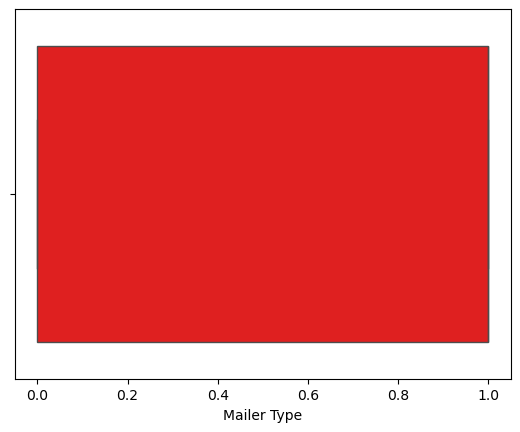

<Figure size 500x500 with 0 Axes>

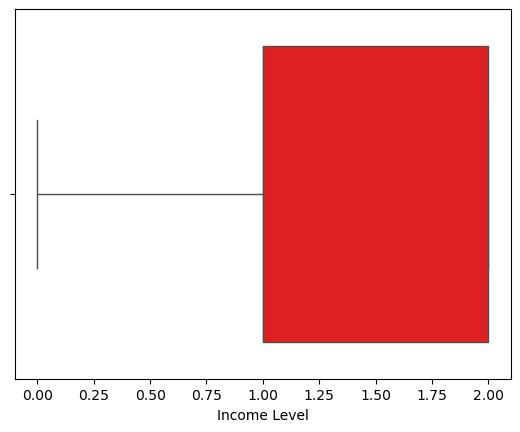

<Figure size 500x500 with 0 Axes>

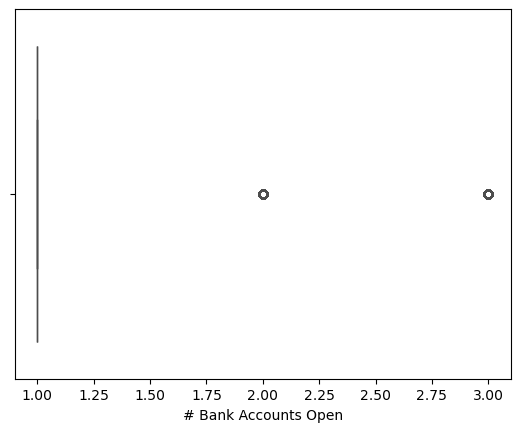

<Figure size 500x500 with 0 Axes>

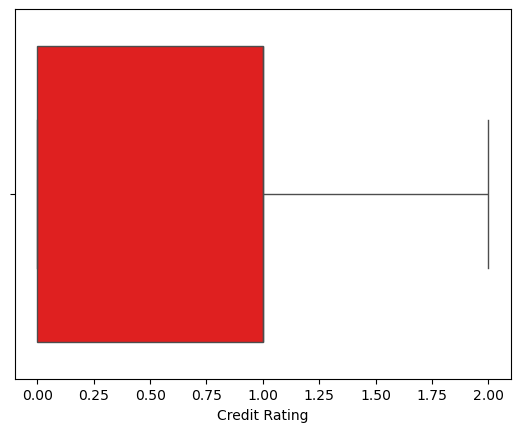

<Figure size 500x500 with 0 Axes>

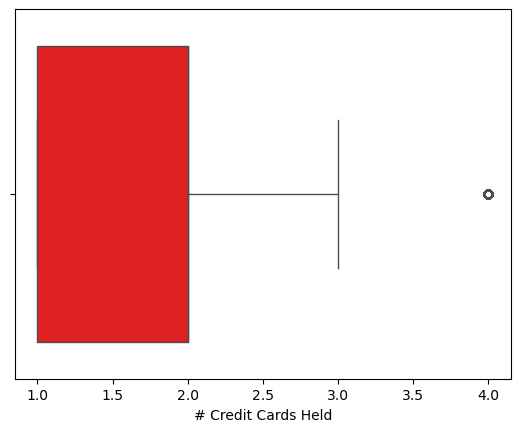

<Figure size 500x500 with 0 Axes>

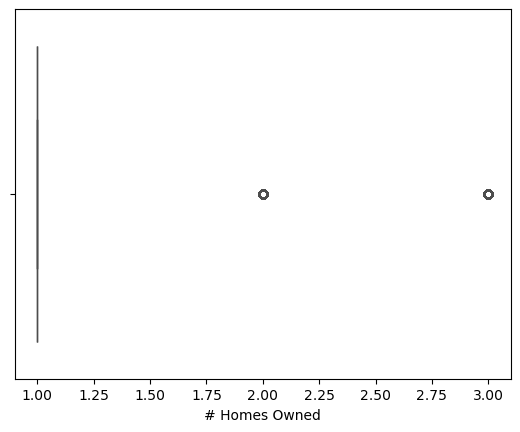

<Figure size 500x500 with 0 Axes>

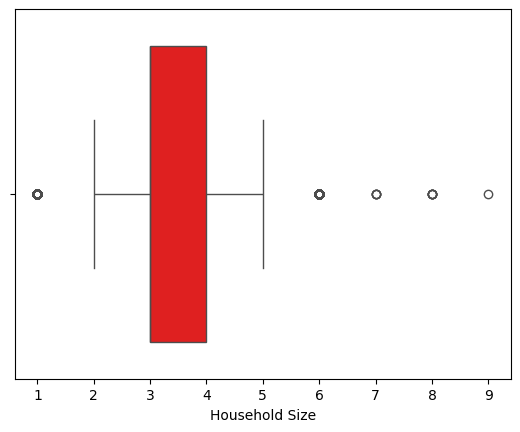

<Figure size 500x500 with 0 Axes>

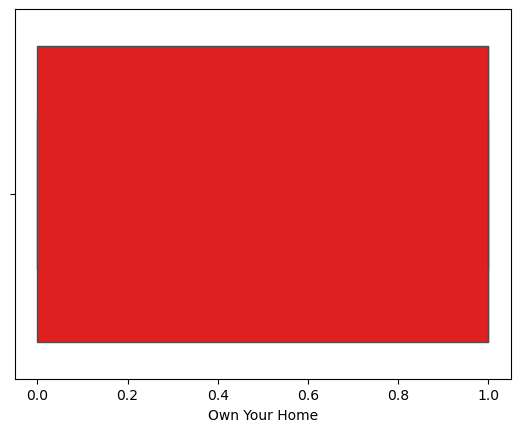

<Figure size 500x500 with 0 Axes>

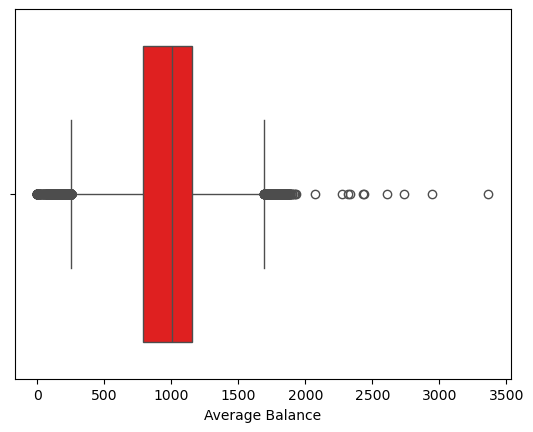

<Figure size 500x500 with 0 Axes>

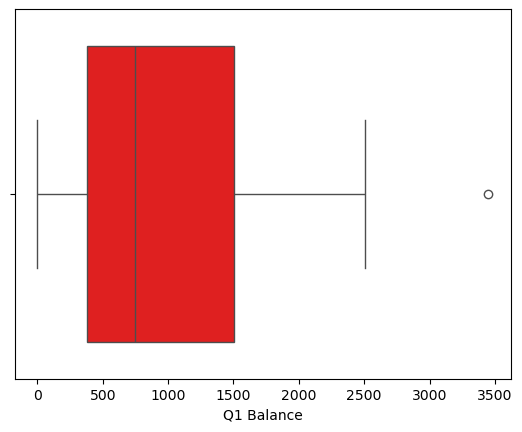

<Figure size 500x500 with 0 Axes>

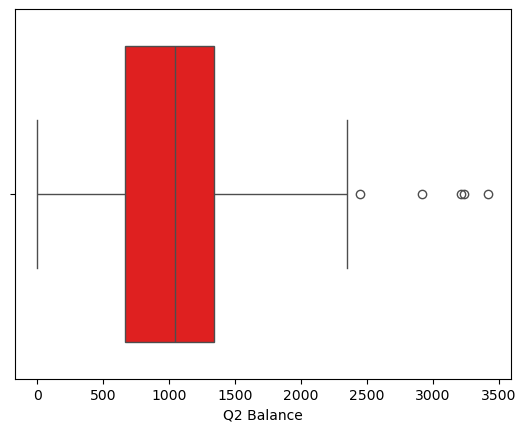

<Figure size 500x500 with 0 Axes>

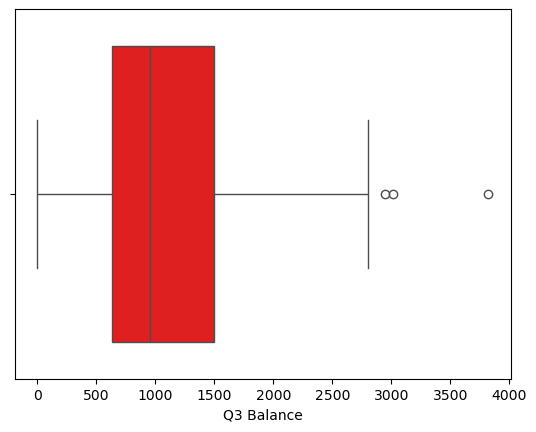

<Figure size 500x500 with 0 Axes>

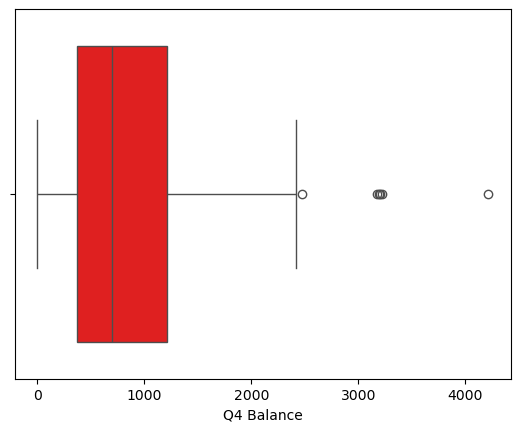

<Figure size 500x500 with 0 Axes>

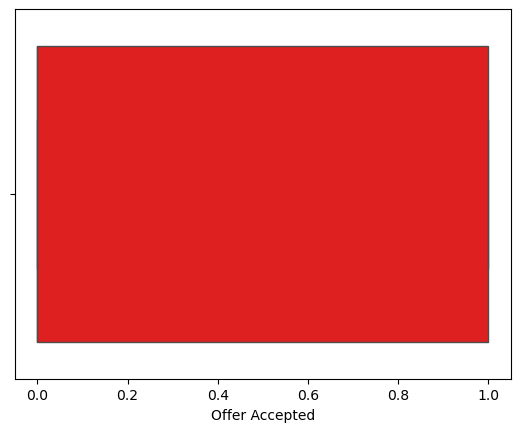

<Figure size 500x500 with 0 Axes>

In [41]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df1,color ='red')
    plt.figure(figsize=(5, 5))
    plt.show()

In [42]:
def remove_outliers(df):
    for col in df1.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [43]:
df2 = remove_outliers(df1)

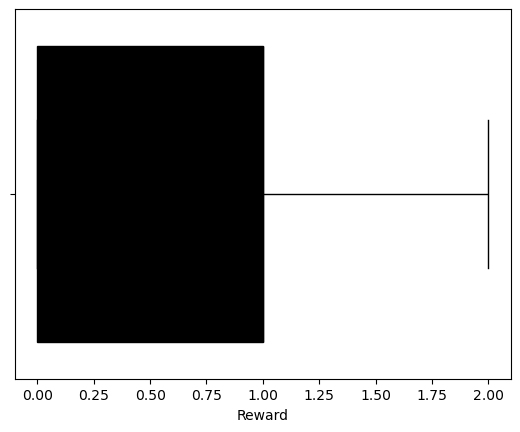

<Figure size 600x600 with 0 Axes>

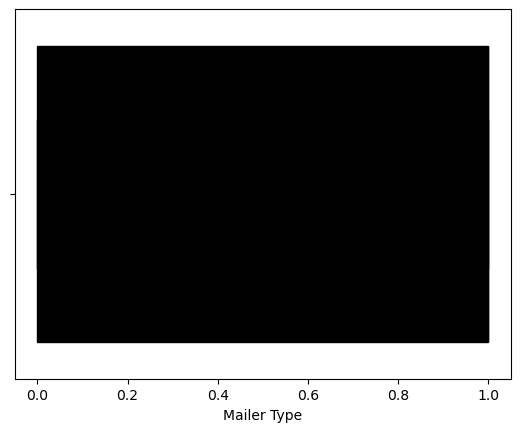

<Figure size 600x600 with 0 Axes>

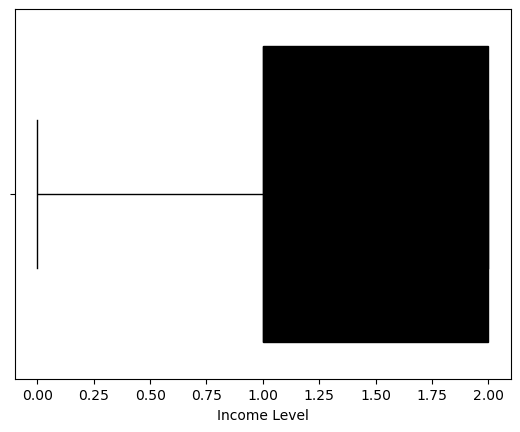

<Figure size 600x600 with 0 Axes>

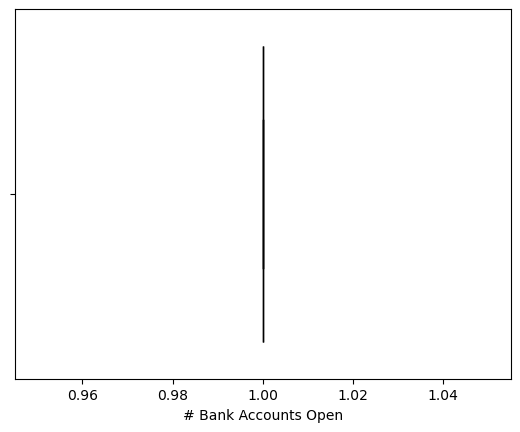

<Figure size 600x600 with 0 Axes>

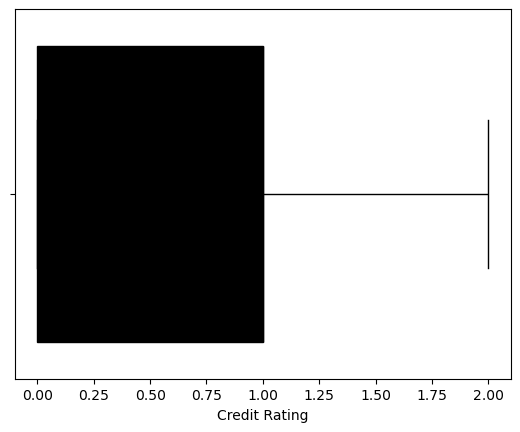

<Figure size 600x600 with 0 Axes>

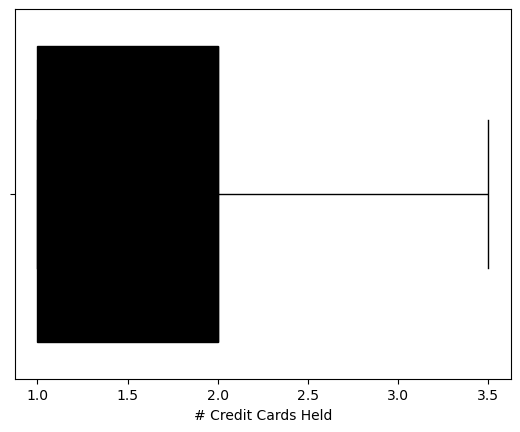

<Figure size 600x600 with 0 Axes>

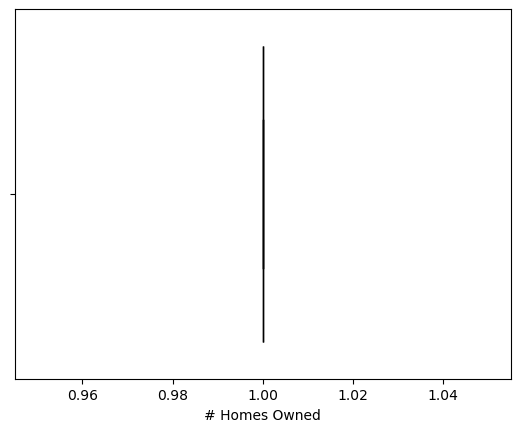

<Figure size 600x600 with 0 Axes>

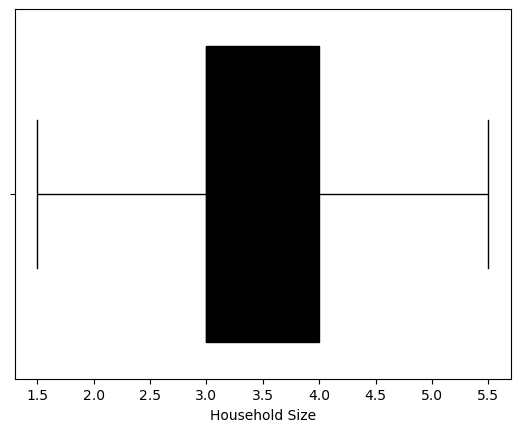

<Figure size 600x600 with 0 Axes>

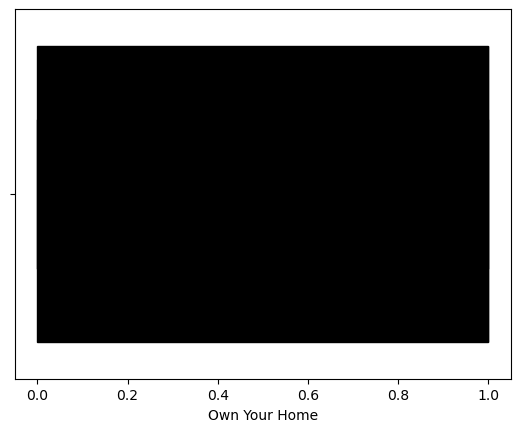

<Figure size 600x600 with 0 Axes>

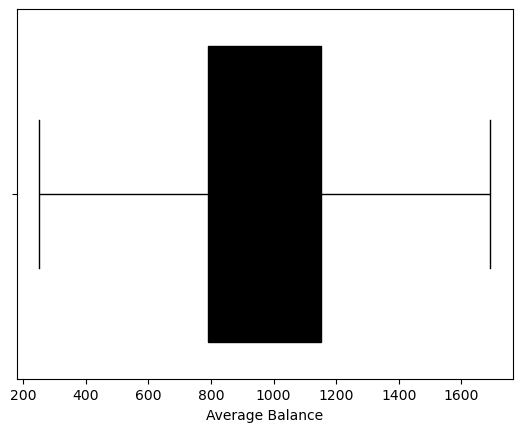

<Figure size 600x600 with 0 Axes>

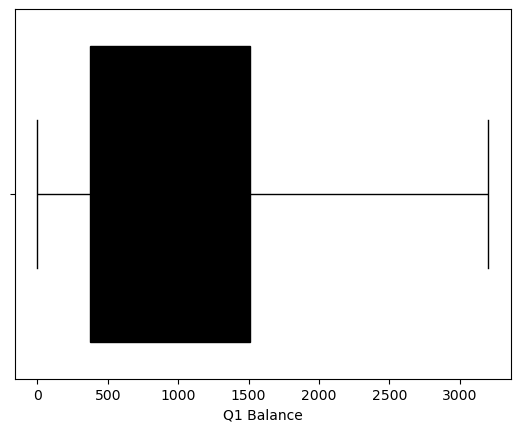

<Figure size 600x600 with 0 Axes>

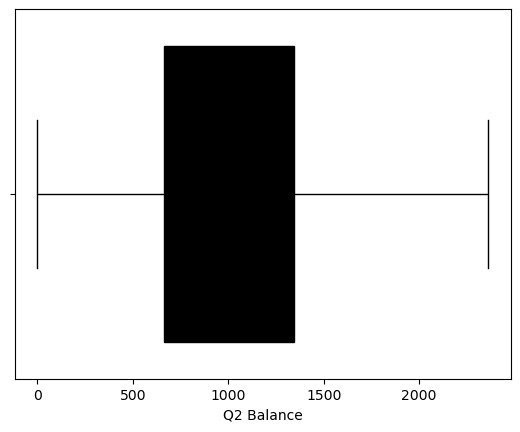

<Figure size 600x600 with 0 Axes>

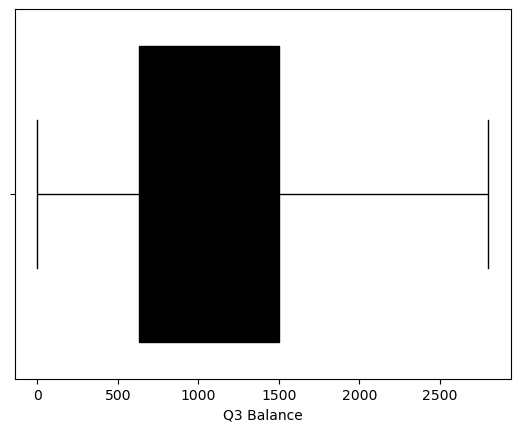

<Figure size 600x600 with 0 Axes>

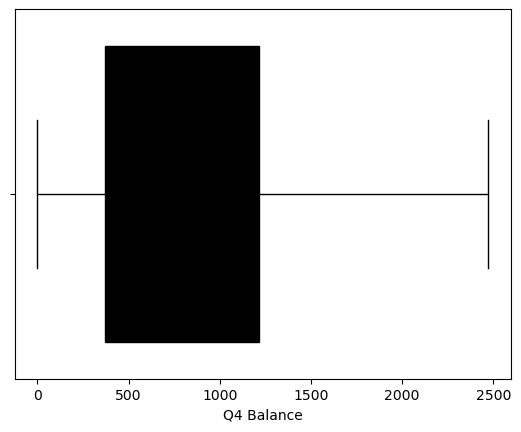

<Figure size 600x600 with 0 Axes>

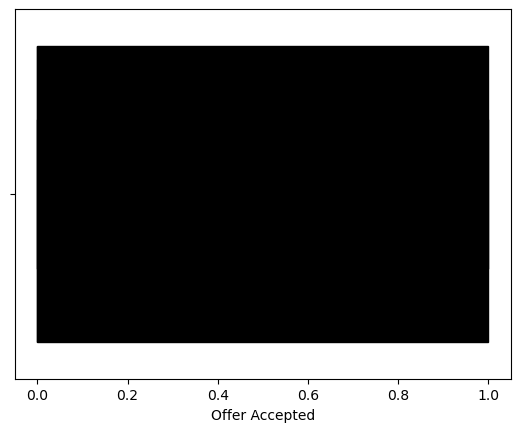

<Figure size 600x600 with 0 Axes>

In [44]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df2,color ='black')
    plt.figure(figsize=(6, 6))
    plt.show()

# Handling Skewness

In [46]:
df3 = df2[numerical_features.columns]
df3

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1.0,0,2.0,1.0,4.0,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1.0,2,2.0,1.0,5.0,1,251.279173,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,1.0,2,2.0,1.0,2.0,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,1.0,0,1.0,1.0,4.0,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1.0,2,2.0,1.0,5.5,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,0,1,0,1.0,1,2.0,1.0,1.5,0,1224.329632,540.768252,1761.342167,1661.903355,933.304755,1
33950,0,1,1,1.0,2,1.0,1.0,3.0,1,989.343048,147.876554,868.735395,1468.842982,1471.917261,1
33951,1,0,0,1.0,0,1.0,1.0,5.0,0,1123.493505,1792.765323,1737.367447,429.808669,534.032582,1
33952,1,0,2,1.0,1,1.0,1.0,3.0,1,949.752307,154.924491,1600.687057,1456.570895,586.826787,1


In [47]:
df3.skew()

Reward                  0.382107
Mailer Type            -0.020384
Income Level           -0.219746
# Bank Accounts Open    0.000000
Credit Rating           0.071460
# Credit Cards Held     0.508364
# Homes Owned           0.000000
Household Size          0.179183
Own Your Home          -0.165272
Average Balance        -0.668175
Q1 Balance              0.450418
Q2 Balance             -0.264049
Q3 Balance              0.230551
Q4 Balance              0.617719
Offer Accepted          0.000118
dtype: float64

In [48]:
pt = PowerTransformer(method='yeo-johnson')

In [49]:
numerical_features = df3.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['Reward', 'Mailer Type', 'Income Level', '# Bank Accounts Open',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance', 'Offer Accepted'],
      dtype='object')

In [50]:
df3[numerical_features] = pt.fit_transform(df3[numerical_features])
df3[numerical_features]

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,-1.079018,-1.010243,-1.454436,0.0,-1.428557,0.534818,0.0,0.731625,-1.086040,0.644785,1.171088,-0.260686,0.166695,0.507691,-0.999941
1,-1.079018,-1.010243,1.138707,0.0,1.480664,0.534818,0.0,1.629358,0.920776,-1.852051,-1.977583,-1.970904,-2.077989,-0.709388,-0.999941
2,-1.079018,0.989861,-1.454436,0.0,1.480664,0.534818,0.0,-1.363163,0.920776,-1.807473,-0.748233,-1.418461,-1.848353,-1.064330,-0.999941
3,-1.079018,-1.010243,1.138707,0.0,-1.428557,-1.116317,0.0,0.731625,-1.086040,0.852786,1.073893,1.659483,0.207179,-0.577510,-0.999941
4,-1.079018,-1.010243,1.138707,0.0,1.480664,0.534818,0.0,2.052036,0.920776,0.823938,1.633295,0.786028,-0.027730,-0.711970,-0.999941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,-1.079018,0.989861,-1.454436,0.0,0.131804,0.534818,0.0,-1.982462,-1.086040,0.872054,-0.375575,1.662385,1.063265,0.401697,1.000059
33950,-1.079018,0.989861,-0.172358,0.0,1.480664,-1.116317,0.0,-0.254241,0.920776,0.061213,-1.401398,-0.278786,0.770395,1.147395,1.000059
33951,0.491224,-1.010243,-1.454436,0.0,-1.428557,-1.116317,0.0,1.629358,-1.086040,0.514270,1.298765,1.610534,-1.108725,-0.318830,1.000059
33952,0.491224,-1.010243,1.138707,0.0,0.131804,-1.116317,0.0,-0.254241,0.920776,-0.067257,-1.374148,1.314675,0.751391,-0.210052,1.000059


In [51]:
df3[numerical_features].skew()

Reward                  0.038990
Mailer Type            -0.020384
Income Level           -0.202641
# Bank Accounts Open    0.000000
Credit Rating          -0.094886
# Credit Cards Held     0.056754
# Homes Owned           0.000000
Household Size         -0.030555
Own Your Home          -0.165272
Average Balance        -0.179688
Q1 Balance             -0.149908
Q2 Balance             -0.283864
Q3 Balance             -0.147085
Q4 Balance             -0.115428
Offer Accepted          0.000118
dtype: float64

Text(0.5, 1.0, 'Credit Card Usage')

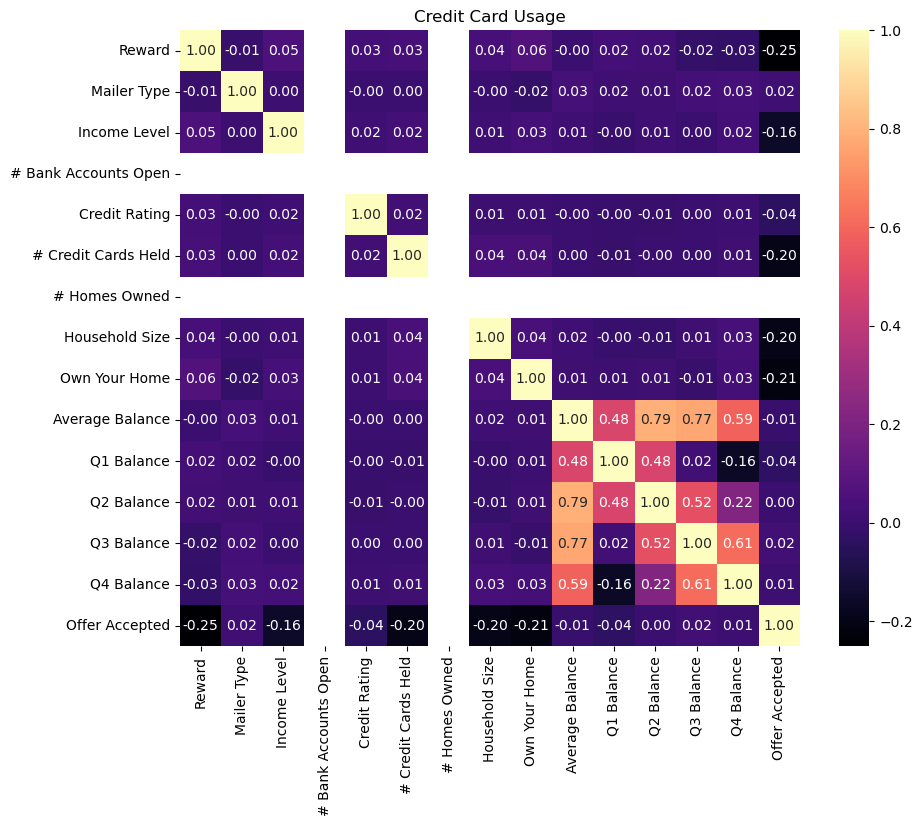

In [52]:
corr=df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='magma') 
plt.title("Credit Card Usage")

# Feature Selection

In [54]:
x = df3.drop(columns = ['Offer Accepted'])
y = df3['Offer Accepted']

In [55]:
sk = SelectKBest(score_func=f_classif,k=10)

In [56]:
x_new = sk.fit_transform(x,y)

In [57]:
selected_features = x.columns[sk.get_support()]

In [58]:
feature_score = pd.DataFrame({'Feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [59]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['Reward', 'Mailer Type', 'Income Level', 'Credit Rating',
       '# Credit Cards Held', 'Household Size', 'Own Your Home',
       'Average Balance', 'Q1 Balance', 'Q3 Balance'],
      dtype='object')
/nfeature scores:
                 Feature        score
0                 Reward  2281.737767
8          Own Your Home  1618.466347
5    # Credit Cards Held  1368.494974
7         Household Size  1345.296913
2           Income Level   869.860812
4          Credit Rating    48.356267
10            Q1 Balance    42.715629
12            Q3 Balance    11.988749
1            Mailer Type    10.749663
9        Average Balance     1.471026
13            Q4 Balance     1.166017
11            Q2 Balance     0.037176
3   # Bank Accounts Open          NaN
6          # Homes Owned          NaN


In [60]:
x_selected = x[selected_features]

In [61]:
x_selected.head()

,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size,Own Your Home,Average Balance,Q1 Balance,Q3 Balance
0,-1.079018,-1.010243,-1.454436,-1.428557,0.534818,0.731625,-1.086040,0.644785,1.171088,0.166695
1,-1.079018,-1.010243,1.138707,1.480664,0.534818,1.629358,0.920776,-1.852051,-1.977583,-2.077989
2,-1.079018,0.989861,-1.454436,1.480664,0.534818,-1.363163,0.920776,-1.807473,-0.748233,-1.848353
3,-1.079018,-1.010243,1.138707,-1.428557,-1.116317,0.731625,-1.086040,0.852786,1.073893,0.207179
4,-1.079018,-1.010243,1.138707,1.480664,0.534818,2.052036,0.920776,0.823938,1.633295,-0.027730


# Scalling

In [63]:
scaler= StandardScaler()

In [64]:
x_scaled=scaler.fit_transform(x_selected)

In [65]:
x_scaled

array([[-1.07901762, -1.01024332, -1.4544357 , ...,  0.64478517,
         1.1710875 ,  0.1666947 ],
       [-1.07901762, -1.01024332,  1.13870661, ..., -1.85205065,
        -1.97758263, -2.07798946],
       [-1.07901762,  0.98986054, -1.4544357 , ..., -1.80747288,
        -0.74823348, -1.84835325],
       ...,
       [ 0.49122352, -1.01024332, -1.4544357 , ...,  0.51426951,
         1.29876548, -1.10872453],
       [ 0.49122352, -1.01024332,  1.13870661, ..., -0.06725681,
        -1.37414776,  0.75139089],
       [ 1.33369051, -1.01024332, -0.17235833, ...,  0.48813019,
         1.40688652, -0.61891347]])

# Train Test Split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [68]:
print(f"x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}\n")

x_train:(27161, 10)
x_test:(6791, 10)
y_train:(27161,)
y_test:(6791,)



# Model Building

In [84]:
# Check Target Variable
if y.dtype == 'float' or y.dtype == 'int64':
    y = y.astype(int)
elif y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

print("✅ Target Variable Fixed:", np.unique(y))

# Check X and y Shape
print("X Shape:", x.shape)
print("y Shape:", y.shape)

# Check if Target Column is in X
if 'Offer Accepted' in x.columns:
    x.drop(columns=['Offer Accepted'], inplace=True)
    print("✅ Target Column Dropped from X")

# Final Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("✅ Final Shapes - x_train:", x_train.shape, "y_train:", y_train.shape)


✅ Target Variable Fixed: [0 1]
X Shape: (33952, 14)
y Shape: (33952,)
✅ Final Shapes - x_train: (27161, 14) y_train: (27161,)


In [90]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [92]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name} --->")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy_score,
        'Report': classification_report(y_test, y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report")
    print(results[name]['Report'])


Training Logistic Regression --->
Logistic Regression Accuracy: 0.6768

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3347
           1       0.68      0.67      0.68      3444

    accuracy                           0.68      6791
   macro avg       0.68      0.68      0.68      6791
weighted avg       0.68      0.68      0.68      6791


Training Random Forest --->
Random Forest Accuracy: 0.9281

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3347
           1       0.91      0.95      0.93      3444

    accuracy                           0.93      6791
   macro avg       0.93      0.93      0.93      6791
weighted avg       0.93      0.93      0.93      6791


Training Decision Tree --->
Decision Tree Accuracy: 0.8684

Classification Report
              precision    recall  f1-score   support

           0       0.90      0

# Hyperparameter Tuning

In [95]:
rfc = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [97]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [99]:
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,  
    scoring=['accuracy', 'f1', 'roc_auc'],  # Use multiple metrics
    refit='f1',  # Choose best model based on F1-score
    n_jobs=-1, 
    verbose=2   
)

In [101]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             refit='f1', scoring=['accuracy', 'f1', 'roc_auc'], verbose=2)

In [103]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best {grid_search.refit} Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best f1 Score: 0.9216779861970984


In [105]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [107]:

best_model = RandomForestClassifier(
    max_features='sqrt',
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)

In [111]:
best_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [115]:
y_pred = best_model.predict(x_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9282874392578413
F1 Score: 0.9306761565836299
